** Pyspark Basic Introduction**

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488490 sha256=4d48c0db1ec4f6552197d39f2a12b4066a14796ec107d6e531f8dfd32fd1e4dd
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
import pyspark
import pandas as pd


In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Practise').getOrCreate()
spark

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_pyspark=spark.read.csv('/content/drive/My Drive/raw-data/data1.csv')


In [ ]:
df_pyspark.show()

+---------+---+----------+------+
|      _c0|_c1|       _c2|   _c3|
+---------+---+----------+------+
|     Name|age|Experience|Salary|
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [ ]:
### read the dataset

df_pyspark=spark.read.option('header','true').csv('/content/drive/My Drive/raw-data/data1.csv')

In [ ]:
df_pyspark.show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [ ]:
type(df_pyspark)


pyspark.sql.dataframe.DataFrame

In [ ]:
#Print the schema
df_pyspark.printSchema()


root
 |-- Name: string (nullable = true)
 |-- age: string (nullable = true)
 |-- Experience: string (nullable = true)
 |-- Salary: string (nullable = true)



In [ ]:
df_pyspark.show()


+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [ ]:
type(df_pyspark)


pyspark.sql.dataframe.DataFrame

In [ ]:
df_pyspark.head(10)


[Row(Name='Aman', age='31', Experience='10', Salary='30000'),
 Row(Name='Sudhanshu', age='30', Experience='8', Salary='25000'),
 Row(Name='Sunny', age='29', Experience='4', Salary='20000'),
 Row(Name='Paul', age='24', Experience='3', Salary='20000'),
 Row(Name='Harsha', age='21', Experience='1', Salary='15000'),
 Row(Name='Shubham', age='23', Experience='2', Salary='18000')]

In [ ]:
df_pyspark.select(['Name','age']).show()


+---------+---+
|     Name|age|
+---------+---+
|     Aman| 31|
|Sudhanshu| 30|
|    Sunny| 29|
|     Paul| 24|
|   Harsha| 21|
|  Shubham| 23|
+---------+---+



In [ ]:
df_pyspark['Name']


Column<'Name'>

In [ ]:
df_pyspark.dtypes


[('Name', 'string'),
 ('age', 'string'),
 ('Experience', 'string'),
 ('Salary', 'string')]

In [ ]:
df_pyspark.describe().show()


+-------+-----+------------------+-----------------+------------------+
|summary| Name|               age|       Experience|            Salary|
+-------+-----+------------------+-----------------+------------------+
|  count|    6|                 6|                6|                 6|
|   mean| NULL|26.333333333333332|4.666666666666667|21333.333333333332|
| stddev| NULL| 4.179314138308661|3.559026084010437| 5354.126134736337|
|    min| Aman|                21|                1|             15000|
|    max|Sunny|                31|                8|             30000|
+-------+-----+------------------+-----------------+------------------+



In [ ]:
### Adding Columns in data frame
df_pyspark=df_pyspark.withColumn('Experience After 2 year',df_pyspark['Experience']+2)


In [ ]:
df_pyspark.show()


+---------+---+----------+------+-----------------------+
|     Name|age|Experience|Salary|Experience After 2 year|
+---------+---+----------+------+-----------------------+
|     Aman| 31|        10| 30000|                   12.0|
|Sudhanshu| 30|         8| 25000|                   10.0|
|    Sunny| 29|         4| 20000|                    6.0|
|     Paul| 24|         3| 20000|                    5.0|
|   Harsha| 21|         1| 15000|                    3.0|
|  Shubham| 23|         2| 18000|                    4.0|
+---------+---+----------+------+-----------------------+



In [ ]:
### Drop the columns
df_pyspark=df_pyspark.drop('Experience After 2 year')


In [ ]:
df_pyspark.show()


+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [ ]:
### Rename the columns
df_pyspark.withColumnRenamed('Name','New Name').show()


+---------+---+----------+------+
| New Name|age|Experience|Salary|
+---------+---+----------+------+
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



**Pyspark Handling Missing Values**

*   Dropping Columns
*   Dropping Rows
*   Various Parameter In Dropping functionalities
*   Handling Missing values by Mean, Median And Mode





In [ ]:
df_pyspark=spark.read.csv('/content/drive/My Drive/raw-data/data2.csv',header=True,inferSchema=True)

In [ ]:
df_pyspark.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)



In [ ]:
df_pyspark.show()


+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|     Aman|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
+---------+----+----------+------+



In [ ]:
##drop the columns
df_pyspark.drop('Name').show()


+----+----------+------+
| age|Experience|Salary|
+----+----------+------+
|  31|        10| 30000|
|  30|         8| 25000|
|  29|         4| 20000|
|  24|         3| 20000|
|  21|         1| 15000|
|  23|         2| 18000|
|NULL|      NULL| 40000|
|  34|        10| 38000|
|  36|      NULL|  NULL|
+----+----------+------+



In [ ]:
df_pyspark.show()


+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|     Aman|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
+---------+----+----------+------+



In [ ]:
df_pyspark.na.drop().show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [ ]:
### any==how
df_pyspark.na.drop(how="any").show()


+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [ ]:
##threshold
df_pyspark.na.drop(how="any",thresh=3).show()


+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
|     NULL| 34|        10| 38000|
+---------+---+----------+------+



In [ ]:
df_pyspark.show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|     Aman|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
+---------+----+----------+------+



In [ ]:
##Subset
df_pyspark.na.drop(how="any",subset=['Age']).show()


+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
|     NULL| 34|        10| 38000|
|     NULL| 36|      NULL|  NULL|
+---------+---+----------+------+



In [ ]:
### Filling the Missing Value
df_pyspark.na.fill('Missing Values',['Experience','age']).show()
df_pyspark.na.fill('Missing Values').show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|     Aman|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|     NULL|  34|        10| 38000|
|     NULL|  36|      NULL|  NULL|
+---------+----+----------+------+

+--------------+----+----------+------+
|          Name| age|Experience|Salary|
+--------------+----+----------+------+
|          Aman|  31|        10| 30000|
|     Sudhanshu|  30|         8| 25000|
|         Sunny|  29|         4| 20000|
|          Paul|  24|         3| 20000|
|        Harsha|  21|         1| 15000|
|       Shubham|  23|         2| 18000|
|        Mahesh|NULL|      NULL| 40000|
|Missing Values|  34|        10| 38000|
|Missing Values|  36|      NULL|  NULL|
+--------------+----+----------+------+



**Pyspark Dataframes**
*   Filter Operation
*   &,|,==
*   ~


In [ ]:
df_pyspark=spark.read.csv('/content/drive/My Drive/raw-data/data1.csv',header=True,inferSchema=True)
df_pyspark.show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [ ]:
### Salary of the people less than or equal to 20000
df_pyspark.filter("Salary<=20000").show()


+-------+---+----------+------+
|   Name|age|Experience|Salary|
+-------+---+----------+------+
|  Sunny| 29|         4| 20000|
|   Paul| 24|         3| 20000|
| Harsha| 21|         1| 15000|
|Shubham| 23|         2| 18000|
+-------+---+----------+------+



In [ ]:
df_pyspark.filter("Salary<=20000").select(['Name','age']).show()


+-------+---+
|   Name|age|
+-------+---+
|  Sunny| 29|
|   Paul| 24|
| Harsha| 21|
|Shubham| 23|
+-------+---+



In [ ]:
df_pyspark.filter(df_pyspark['Salary']<=20000).show()


+-------+---+----------+------+
|   Name|age|Experience|Salary|
+-------+---+----------+------+
|  Sunny| 29|         4| 20000|
|   Paul| 24|         3| 20000|
| Harsha| 21|         1| 15000|
|Shubham| 23|         2| 18000|
+-------+---+----------+------+



In [ ]:
df_pyspark.filter((df_pyspark['Salary']<=20000) |
                  (df_pyspark['Salary']>=15000)).show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [ ]:
df_pyspark.filter(~(df_pyspark['Salary']<=20000)).show()


+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|     Aman| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
+---------+---+----------+------+



**Pyspark GroupBy And Aggregate Functions**

In [ ]:
df_pyspark=spark.read.csv('/content/drive/My Drive/raw-data/data3.csv',header=True,inferSchema=True)

df_pyspark.show()


+---------+------------+------+
|     Name| Departments|salary|
+---------+------------+------+
|     Aman|Data Science| 10000|
|     Aman|         IOT|  5000|
|   Mahesh|    Big Data|  4000|
|     Aman|    Big Data|  4000|
|   Mahesh|Data Science|  3000|
|Sudhanshu|Data Science| 20000|
|Sudhanshu|         IOT| 10000|
|Sudhanshu|    Big Data|  5000|
|    Sunny|Data Science| 10000|
|    Sunny|    Big Data|  2000|
+---------+------------+------+



In [ ]:
df_pyspark.printSchema()


root
 |-- Name: string (nullable = true)
 |-- Departments: string (nullable = true)
 |-- salary: integer (nullable = true)



In [ ]:
## Groupby
### Grouped to find the maximum salary
df_pyspark.groupBy('Name').sum().show()


+---------+-----------+
|     Name|sum(salary)|
+---------+-----------+
|Sudhanshu|      35000|
|    Sunny|      12000|
|     Aman|      19000|
|   Mahesh|       7000|
+---------+-----------+



In [ ]:
df_pyspark.groupBy('Name').avg().show()


+---------+------------------+
|     Name|       avg(salary)|
+---------+------------------+
|Sudhanshu|11666.666666666666|
|    Sunny|            6000.0|
|     Aman| 6333.333333333333|
|   Mahesh|            3500.0|
+---------+------------------+



In [ ]:
### Groupby Departmernts  which gives maximum salary
df_pyspark.groupBy('Departments').sum().show()


+------------+-----------+
| Departments|sum(salary)|
+------------+-----------+
|         IOT|      15000|
|    Big Data|      15000|
|Data Science|      43000|
+------------+-----------+



In [ ]:
df_pyspark.groupBy('Departments').mean().show()


+------------+-----------+
| Departments|avg(salary)|
+------------+-----------+
|         IOT|     7500.0|
|    Big Data|     3750.0|
|Data Science|    10750.0|
+------------+-----------+



In [ ]:
df_pyspark.groupBy('Departments').count().show()


+------------+-----+
| Departments|count|
+------------+-----+
|         IOT|    2|
|    Big Data|    4|
|Data Science|    4|
+------------+-----+



In [ ]:
df_pyspark.agg({'Salary':'sum'}).show()


+-----------+
|sum(Salary)|
+-----------+
|      73000|
+-----------+



**MatplotLib**

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
import numpy as np


In [ ]:
## Simple Examples
x=np.arange(0,10)
y=np.arange(11,21)
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[11 12 13 14 15 16 17 18 19 20]


In [ ]:
a=np.arange(40,50)
b=np.arange(50,60)
print(a)
print(b)


[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]


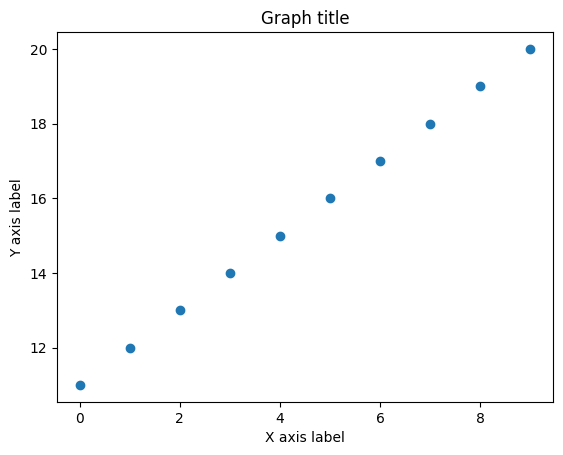

In [ ]:
##plotting using matplotlib

##plt scatter

plt.scatter(x,y)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('Graph title')
plt.savefig('Test.png')

In [ ]:
y=x*x
y

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

Text(0.5, 1.0, '2d Diagram')

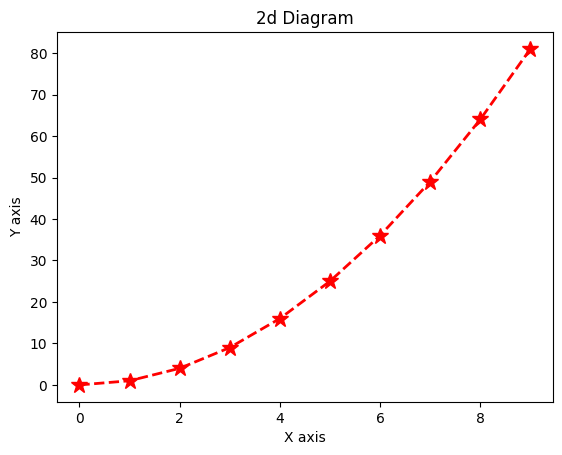

In [ ]:
## plt plot

plt.plot(x,y,'r*',linestyle="dashed",linewidth=2, markersize=12)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('2d Diagram')


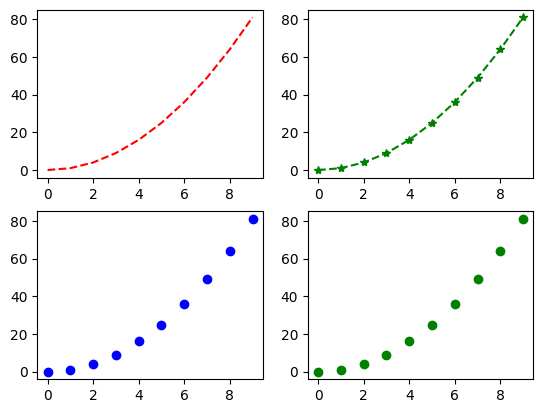

In [ ]:
## Creating Subplots

plt.subplot(2,2,1)
plt.plot(x,y,'r--')
plt.subplot(2,2,2)
plt.plot(x,y,'g*--')
plt.subplot(2,2,3)
plt.plot(x,y,'bo')
plt.subplot(2,2,4)
plt.plot(x,y,'go')

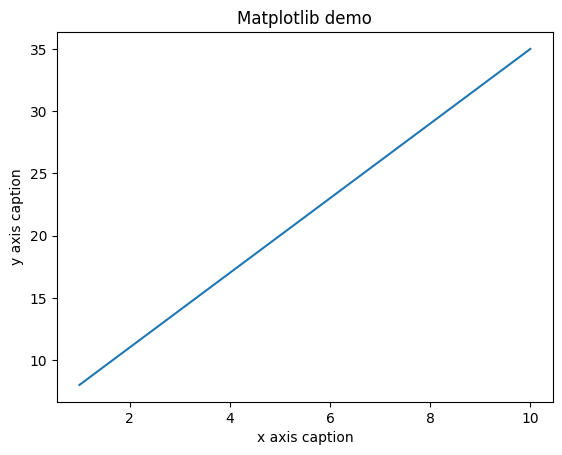

[ 1  2  3  4  5  6  7  8  9 10]
[ 8 11 14 17 20 23 26 29 32 35]


In [ ]:
x = np.arange(1,11)
y = 3 * x + 5
plt.title("Matplotlib demo")
plt.xlabel("x axis caption")
plt.ylabel("y axis caption")
plt.plot(x,y)
plt.show()
print(x)
print(y)

In [ ]:
np.pi

3.141592653589793

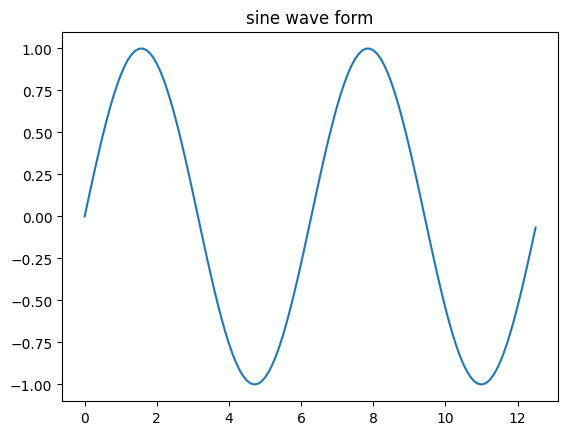

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 4 * np.pi, 0.1)
y = np.sin(x)
plt.title("sine wave form")

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()


In [ ]:
print(x)
print(y)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5]
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.2392

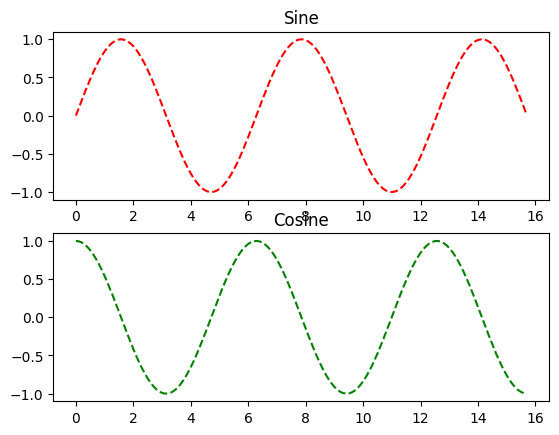

In [ ]:
#Subplot()
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 5 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin,'r--')
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos,'g--')
plt.title('Cosine')


# Show the figure.
plt.show()


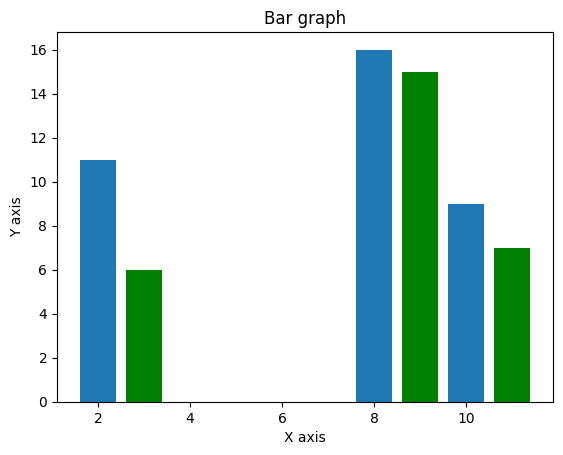

In [ ]:
## Bar plot

x = [2,8,10]
y = [11,16,9]

x2 = [3,9,11]
y2 = [6,15,7]

plt.bar(x, y)
plt.bar(x2, y2, color = 'g')
plt.title('Bar graph')
plt.ylabel('Y axis')
plt.xlabel('X axis')

plt.show()

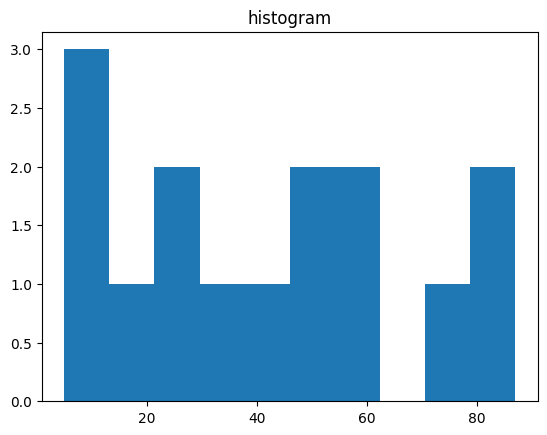

In [ ]:
#Histograms
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
plt.hist(a)
plt.title("histogram")
plt.show()


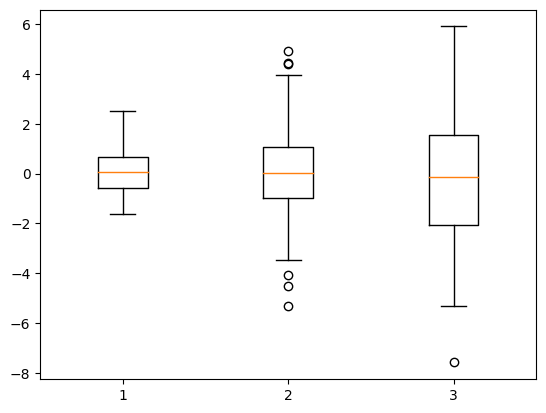

In [ ]:
#Box Plot using Matplotlib
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=False);

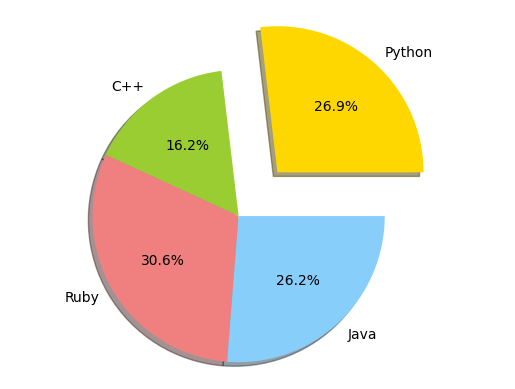

In [ ]:
#Pie Chart

# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.4, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True)

plt.axis('equal')
plt.show()